# Machine Learning for regression

# Car-price prediction project



*   First download the dataset
*   Perform prelimiminary analysis of the data
*   Setup a validation strategy to make sure our model produces correct predictions
*   implement a linear regression model in python and NumPy
*   Perform feature engineering to extract important features from the data to improve the model
*   Making our model stable with regularization and use it to predict car prices













## Downloading the dataset

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
file = "gdrive/My Drive/Colab Notebooks/cardataset.csv"

# Exploratory data analysis

In [3]:
# importing the libs

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Reading the data

df = pd.read_csv(file)

In [5]:
# checking how many rows are in the dataframe

len(df)

11914

In [6]:
# Viewing the first 5 rows

df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
# normalizing the col name and string features

df.columns = df.columns.str.lower().str.replace(" ","_")

string_columns = list(df.dtypes[df.dtypes == "object"].index)

for col in string_columns:
  df[col] = df[col].str.lower().str.replace(" ","_")

In [8]:
# Viewing the newly formatted dataframe

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Target variable analysis

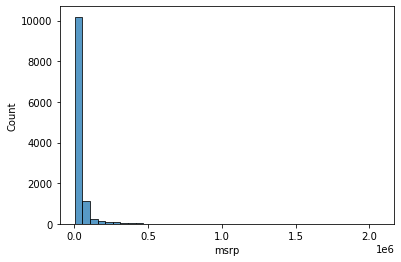

In [9]:
# Viewing the distribution of the target variable msrp using a histogram

sns.histplot(df.msrp,bins=40)

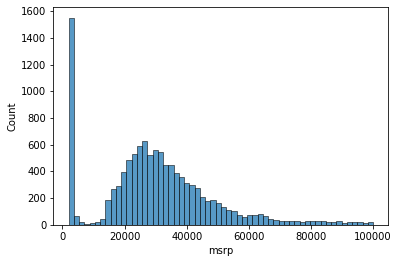

In [10]:
# filtering to plot values below 100,000

sns.histplot(df.msrp[df.msrp < 100000])

In [11]:
# Using logs to smooth out the prices 

log_price = np.log1p(df.msrp)

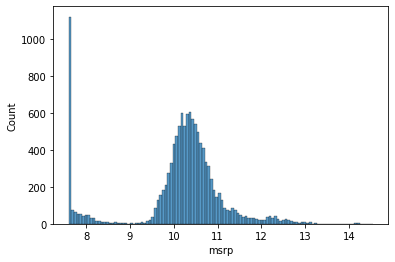

In [12]:
# viewing the distribution of prices after the transformation
sns.histplot(log_price)

# Checking for missing values

In [13]:
# checking if the dataframe has missing values

df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [14]:
# Splitting the dataset into training, validation and test sets. 20% validation, 20% test and 60% training

n = len(df)

n_val = int(0.2*n)
n_test = int(0.2*n)
n_train = n - (n_val+n_test)

np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]


df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [15]:
# To remove the effect of the long tail in the distribution of prices and to remove it's effect we apply log transformation

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [16]:
# removing the target variable from the dataframes

del df_train["msrp"]
del df_val["msrp"]
del df_test["msrp"]

# Machine learning for regression

## Linear regression

In [17]:
# Typically you would use the built in functions but this is a diy train_linear_regression function

def train_linear_regression(X, y):
    # adding the dummy column
    ones = np.ones(X.shape[0]) # A
    X = np.column_stack([ones, X]) # B
    
    # normal equation formula
    XTX = X.T.dot(X) # C
    XTX_inv = np.linalg.inv(XTX) # D
    w = XTX_inv.dot(X.T).dot(y) # E
    
    return w[0], w[1:] # F

## Predicting the price

## Baseline solution 

In [18]:
#Selecting a few nnumerical features to create a new variable

base = ["engine_hp","engine_cylinders","highway_mpg","city_mpg","popularity"]
df_num = df_train[base]

In [19]:
# Handling missing values

# filling in missing values with 0

df_num = df_num.fillna(0)

In [20]:
# Converting the pandas dataframe into a numpy array

X_train = df_num.values

In [21]:
# Calling our linear regression function to get the weights

w_0, w = train_linear_regression(X_train,y_train)

In [22]:
# applying the weights to training data to see how well it predicts

y_pred = w_0 + X_train.dot(w)

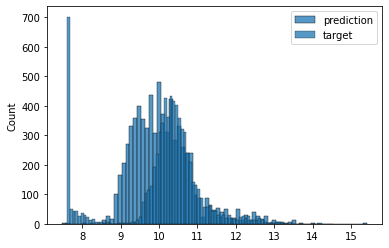

In [23]:
# Using a histplot to see how good the predictions are we use a histplot to plot the predicted values and compare them with the actual prices

sns.histplot(y_pred, label = "prediction")
sns.histplot(y_train, label="target")
plt.legend()

In [24]:
# The distribution of the predicted values are different from the actual values. This may indicate that the model is not powerful enough to capture the dist of the target 

## RMSE: Evaluating model quality

In [25]:
# function to calculate rmse

def rmse(y,y_pred):
  error = y_pred - y
  mse = (error**2).mean()
  return np.sqrt(mse)

In [26]:
# using our newly created rmse function to compute the rmse of our baseline model

rmse(y_train,y_pred)

0.7554192603920132

# Validating the model

In [27]:
# creating a X_val matrix followinng the same steps as for X_train

df_num = df_val[base]
df_num = df_num.fillna(0)
X_val = df_num.values

In [28]:
# applying the model to X_val to get predictions

y_pred = w_0 + X_val.dot(w)

In [29]:
#using y_pred and comparing it with the actual prices

rmse(y_val,y_pred)

0.761653099130158

In [30]:
# To avoid duplication of code writing the following function

def prepare_X(df):
  df_num = df[base]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

# Simple feature engineering

In [31]:
# Creating a new feature age to see if it improves the model

df_train["age"] = 2017 - df_train.year

In [32]:
# modifing prepare_X function to include adding the feature age

def prepare_X(df):
  df = df.copy()
  features = base[:]
  
  df["age"] = 2017 - df.year
  features.append("age")

  df_num = df[features]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [33]:
# Testing the new prepare function also checking to see if adding age improves the model

X_train = prepare_X(df_train)
w_0,w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

print("validation:",rmse(y_val,y_pred))


validation: 0.5172055461058312


In [34]:
# the rmse went down which is a good sign that adding age helped 

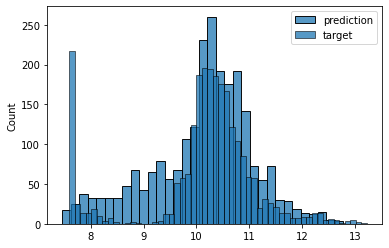

In [35]:
# Viewing the distribution of the predicted values

sns.histplot(y_pred,label="prediction")
sns.histplot(y_val,label="target")
plt.legend()

# Handling categorical variables

In [43]:
# using one-hot encoding to convert the feature number of car doors as a categorical variable

def prepare_X(df):
  df = df.copy()
  features = base[:]
  
  df["age"] = 2017 - df.year
  features.append("age")
  for v in [2,3,4]:
    feature = "num_doors_{}".format(v)
    value = (df["number_of_doors"] == v).astype(int)
    df[feature] = value
    features.append(feature)
  
  for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
    feature = "is_make_{}".format(v)
    df[feature] = (df['make'] == v).astype(int)
    features.append(feature) 

  df_num = df[features]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X


In [44]:
#using the same approach with the make col

# finding the most freq values

df['make'].value_counts().head(5)

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

In [45]:
# checking to see if this improves the rmse of the model

X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

print("Validation:",rmse(y_val,y_pred))

Validation: 0.5076038849556157


In [46]:
# Converting all the categorical variables using one hot encoding

def prepare_X(df):
    df = df.copy()
    features = base.copy()
 
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)
 
    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
 
    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 
              'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
 
    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)
 
    for v in ['front_wheel_drive', 'rear_wheel_drive',
              'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheels_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)
 
    for v in ['crossover', 'flex_fuel', 'luxury', 
              'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)
 
    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)
 
    for v in ['sedan', '4dr_suv', 'coupe', 'convertible',
              '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)
 
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [47]:
# testing the new function

X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
 
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 614.4925509842442


In [48]:
# This did not help and made the model worse 



# Regularization

In [49]:
# Creating a new linear regression function with regularization

def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
 
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
 
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
 
    return w[0], w[1:]

In [50]:
# checking to see what happens to the weights for different values of r

for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[21]))

    0, -108022972550670176.00, 92.78, 108022972550618752.00
0.001, 7.20, -0.10, 1.81
 0.01, 7.18, -0.10, 1.81
  0.1, 7.05, -0.10, 1.78
    1, 6.22, -0.10, 1.56
   10, 4.39, -0.09, 1.08


In [53]:
# using a regularization with r = 0.001

X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
 
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.4602267629618243


In [54]:
# testing all the regularization values to see which one is the best

X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
 
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.4602256246031564
0.0001 0.4602254929770475
 0.001 0.4602267629618243
  0.01 0.46023949633246664
   0.1 0.46037006958799537
     1 0.4618298042643336
     5 0.4684079627533478
    10 0.4757248100693966


In [55]:
# using r=0.01 as the final model now checking it against the test dataset to verify if the model works

X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)
 
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))
 
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.46023949633246664
test: 0.45718136795499037


In [56]:
# Because these two numbers are pretty close we conclude that the model can generalize well to new unseen data